
#   Task 2 – Regression using PyTorch (35%)

##  Part 1 (13 marks):
1. $ y = 3(t^2 + 2)^2$, where $ t = 2x + c$

In [1]:
import torch

# Initialize variables
x = torch.tensor(1.0, requires_grad=True)
c = torch.tensor(1.0)

# Define equation 1
t = 2*x + c
y = 3 * (t**2 + 2)**2

# Calculate gradient
y.backward()

# Print the gradient dy/dx
print("Gradient dy/dx for equation 1:", x.grad)

Gradient dy/dx for equation 1: tensor(792.)


2. $ y = 3(s^3 + s) + 2c^4 $, where $ s = 2x $

In [3]:
# Reset gradient
x.grad = None

# Define equation 2
s = 2*x
y = 3 * (s**3 + s) + 2*c**4

# Calculate gradient
y.backward()

# Print the gradient dy/dx
print("Gradient dy/dx for equation 2:", x.grad)

Gradient dy/dx for equation 2: tensor(78.)



3. $ y = 2t + c $, where $ t = (p^2 + 2p + 3)^2 $, $ p = 2r^3 + 3r $, $ r = 2q + 3 $, $ q = 2x + c $

In [4]:

# Reset gradient
x.grad = None

# Define equation 3
q = 2*x + c
r = 2*q + 3
p = 2*r**3 + 3*r
t = (p**2 + 2*p + 3)**2
y = 2*t + c

# Calculate gradient
y.backward()

# Print the gradient dy/dx
print("Gradient dy/dx for equation 3:", x.grad)

Gradient dy/dx for equation 3: tensor(5.1347e+13)



Q4) Draw (by-hand) two separate diagrams/ computational maps for the functions shown in
Q1 & Q2 of this Task. That is, the diagram/ computational map should highlight the
significant sub-components, demonstrating how inputs 𝑥 & 𝑐 are converted to the final
function �




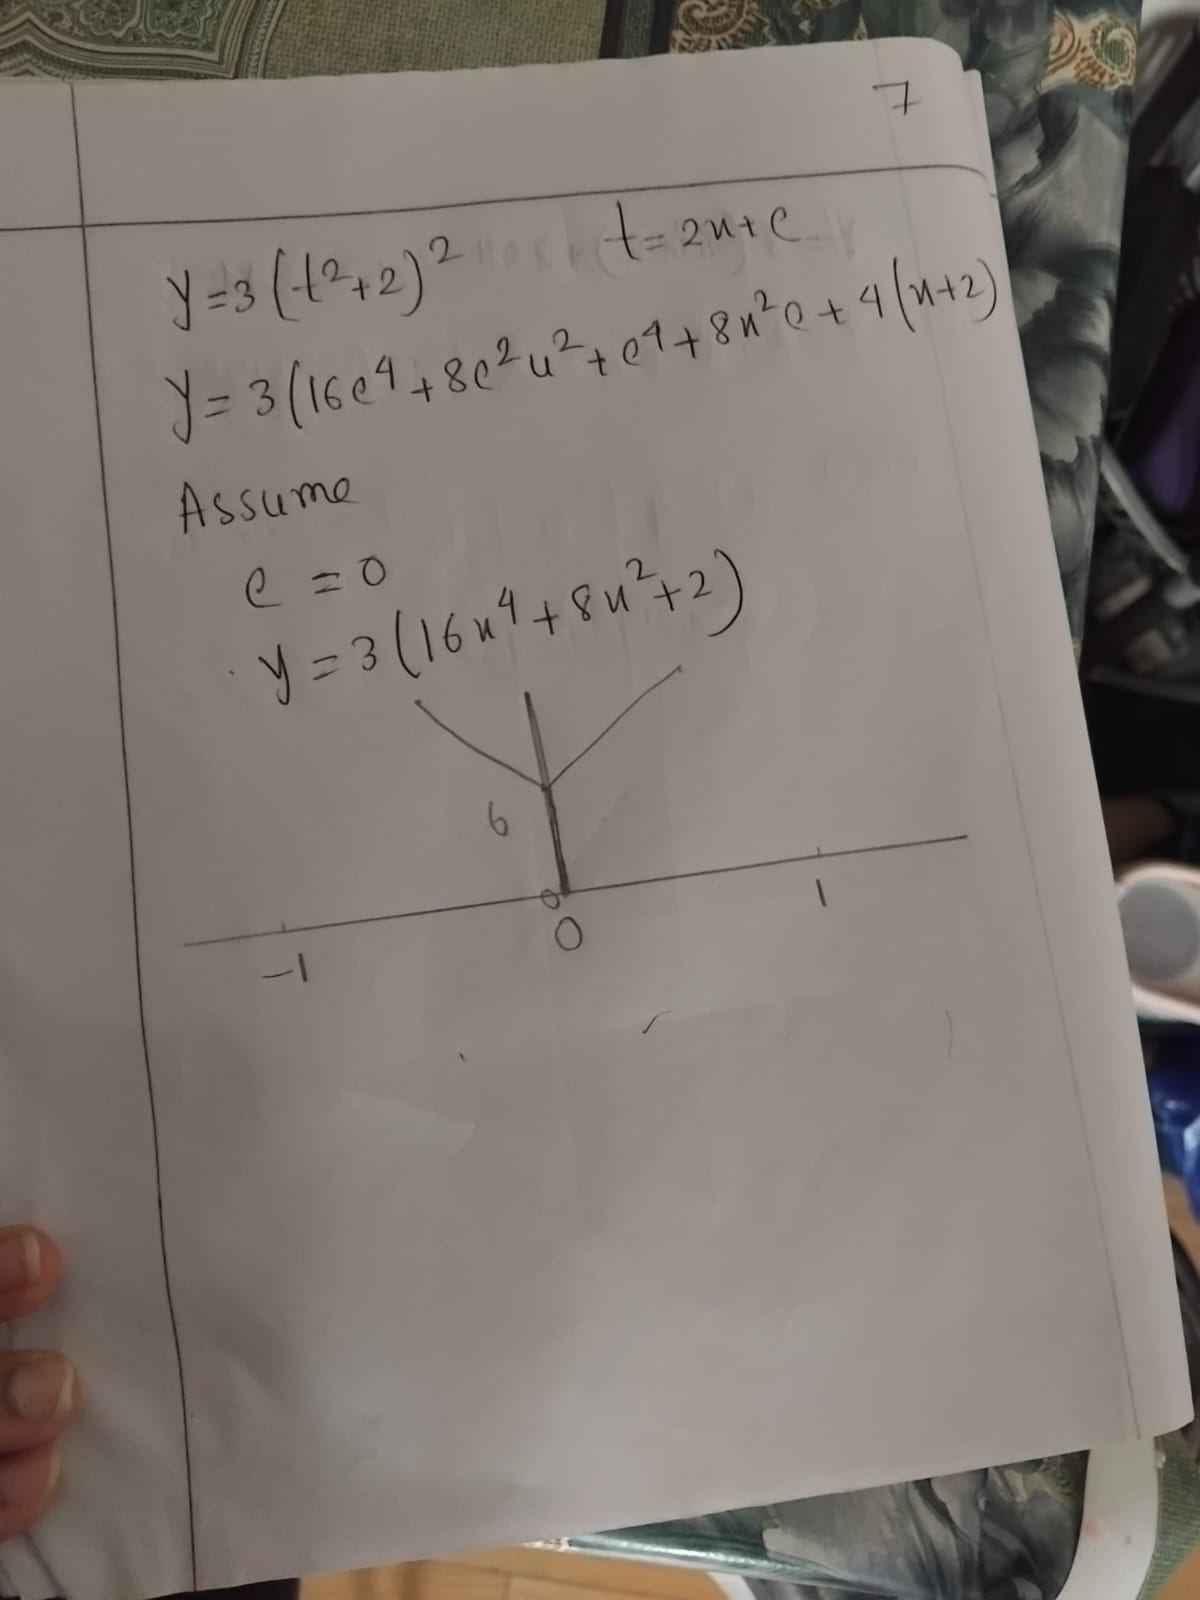

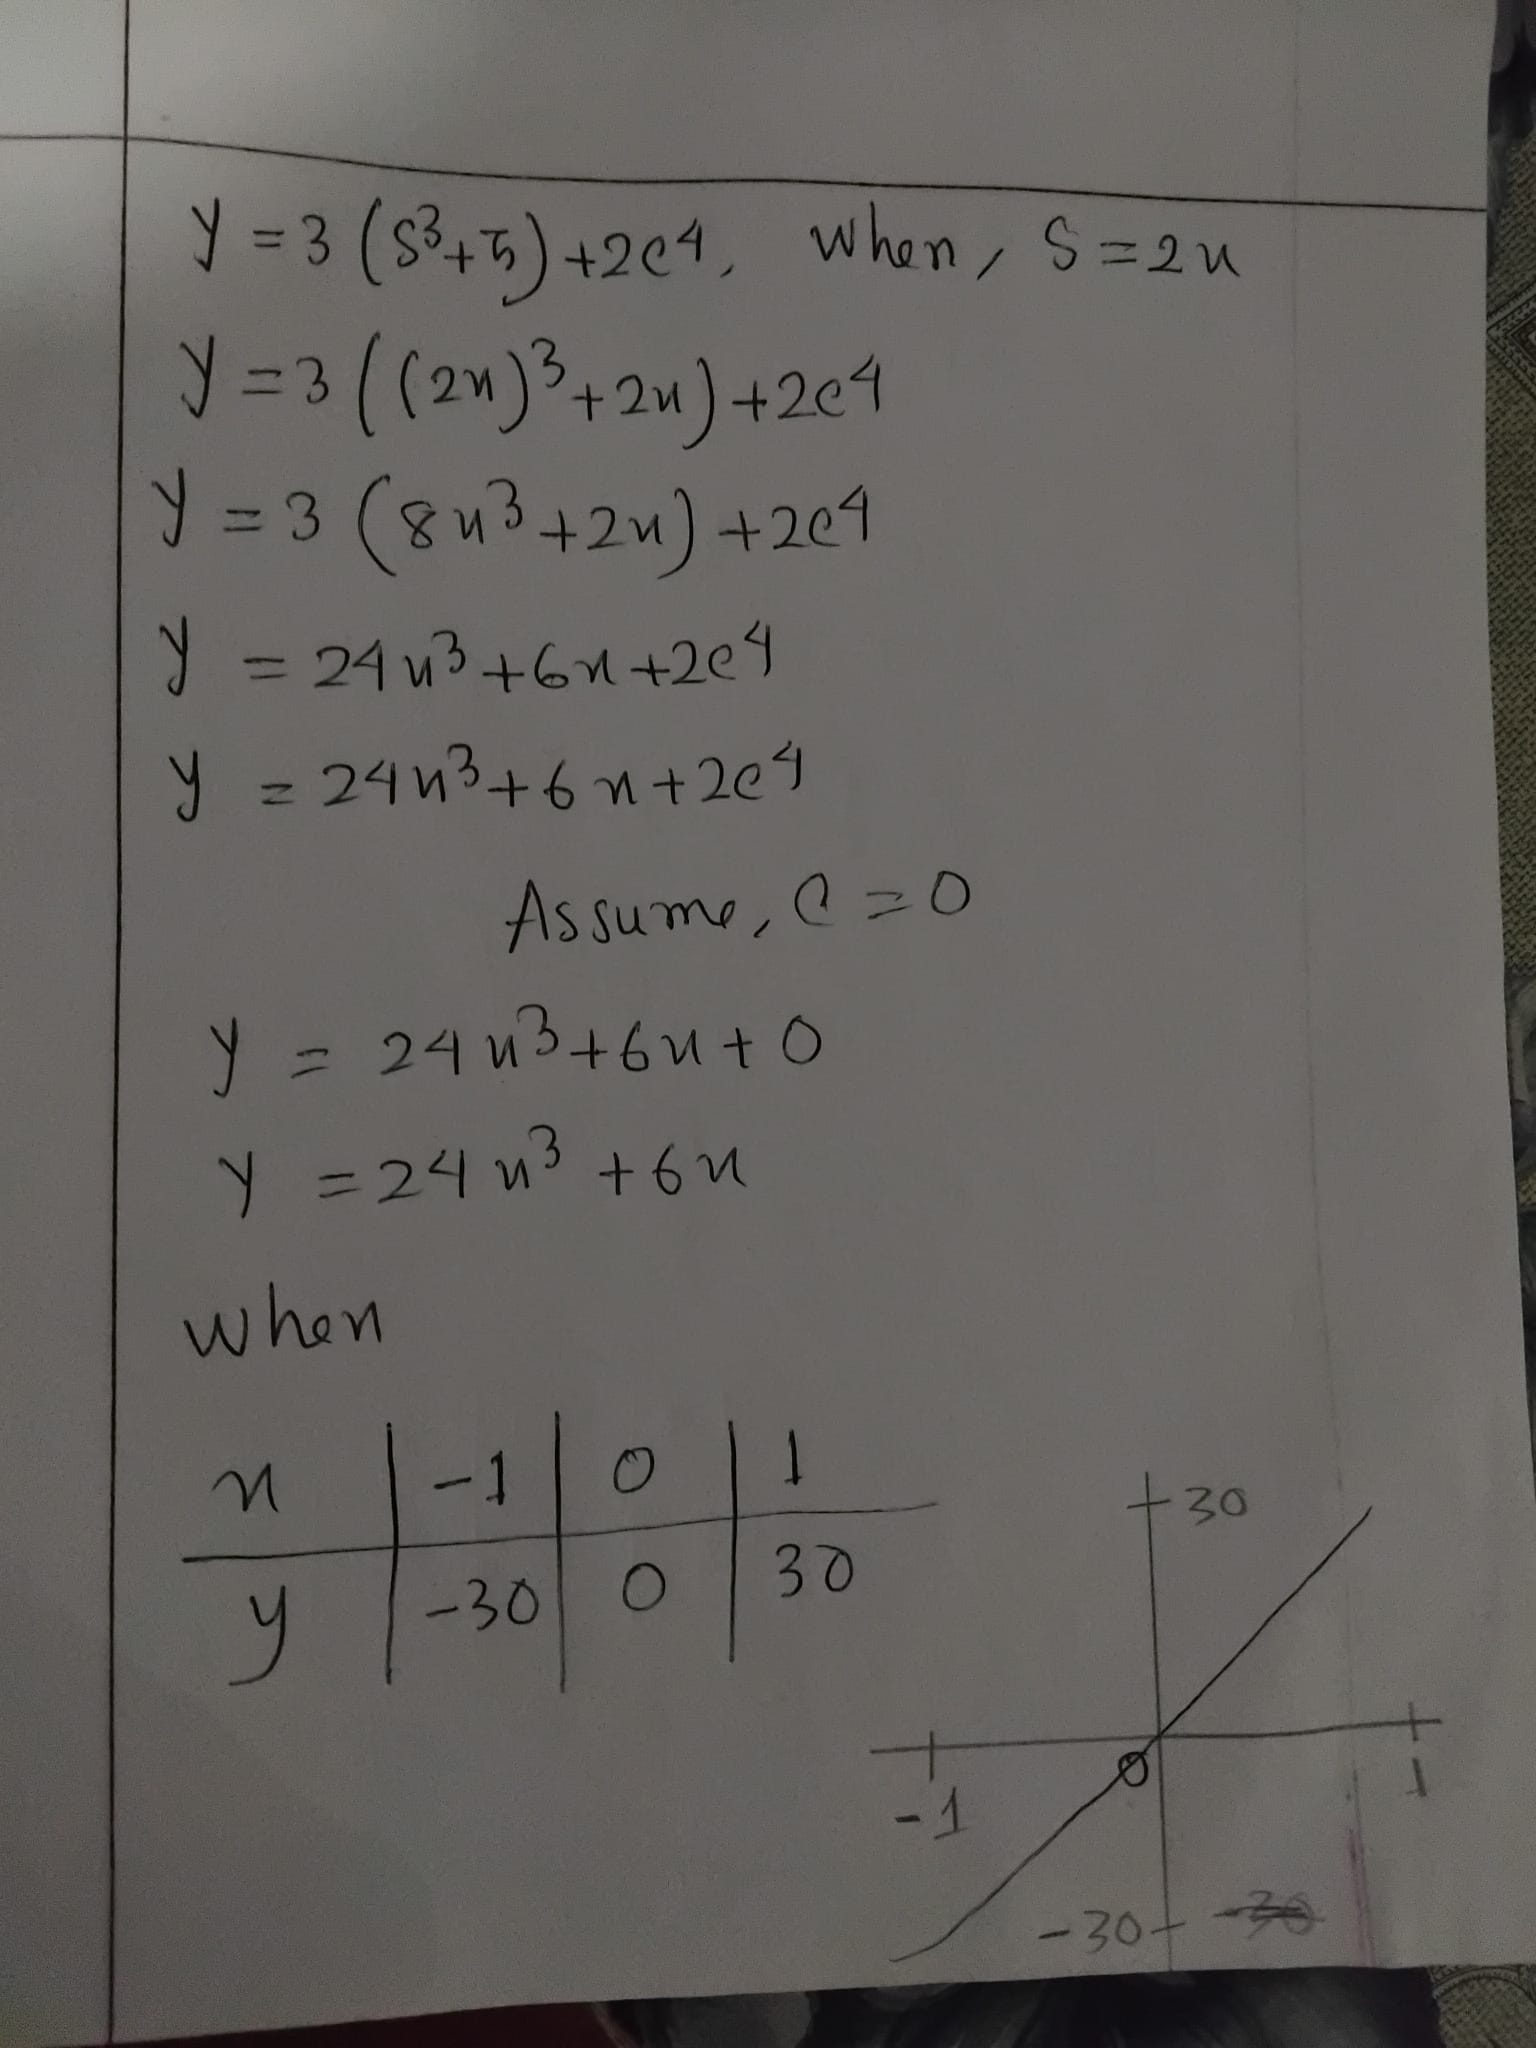

## Part 2 (22 marks):
Using PyTorch without helper functions (without using torch.nn or torch.optim), calculate
the values of 𝑎 & 𝑏 that best fit the model 𝑓(𝑥) using the gradient descent algorithms with
the following


$ f(x) = e^{-ax} + 2ax + b $

where:

Certainly, here are the complete X and Y values:

$ X = [-2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0] $

$ Y = [6.255, 6.121, 6.005, 5.907, 5.825, 5.758, 5.704, 5.664, 5.636, 5.62, 5.614, 5.618, 5.631, 5.652, 5.682, 5.719, 5.763, 5.814, 5.87, 5.933, 6.0, 6.072, 6.149, 6.231, 6.316, 6.405, 6.497, 6.593, 6.691, 6.793, 6.897, 7.003, 7.112, 7.223, 7.335, 7.45, 7.566, 7.684, 7.804, 7.924] $

In [1]:
import torch
import numpy as np

# Given data
X = torch.tensor([-2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1,
                  -1, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0,
                  0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                  1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0], dtype=torch.float32)
Y = torch.tensor([6.255, 6.121, 6.005, 5.907, 5.825, 5.758, 5.704, 5.664, 5.636, 5.62,
                  5.614, 5.618, 5.631, 5.652, 5.682, 5.719, 5.763, 5.814, 5.87, 5.933,
                  6.0, 6.072, 6.149, 6.231, 6.316, 6.405, 6.497, 6.593, 6.691, 6.793,
                  6.897, 7.003, 7.112, 7.223, 7.335, 7.45, 7.566, 7.684, 7.804, 7.924], dtype=torch.float32)

# Initialize parameters a and b with random values
a = torch.randn(1, requires_grad=True, dtype=torch.float32)
b = torch.randn(1, requires_grad=True, dtype=torch.float32)

# Learning rate
learning_rate = 0.01

# Number of epochs
epochs = 1000

# Gradient descent
for epoch in range(epochs):
    # Forward pass: compute predicted y
    y_pred = torch.exp(-a*X) + 2*a*X + b

    # Compute and print loss
    loss = torch.mean((y_pred - Y)**2)

    # Backpropagation to compute gradients of a and b with respect to loss
    loss.backward()

    # Update parameters using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad

        # Manually zero the gradients after updating
        a.grad.zero_()
        b.grad.zero_()

# Print the optimized values of a and b
print("Optimized value of a:", a.item())
print("Optimized value of b:", b.item())


Optimized value of a: 0.6887515783309937
Optimized value of b: 4.952696800231934
